# Audible Insights: Book Recommendation System

## NLP and Clustering

### Importing Libraries

In [20]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Imports the NLTK Library and downloads essential resources

* stopwords: Common words to filter out from text (like "the", "and")
* punkt: Tokenizer model to split text into words/sentences
* wordnet: Lexical database used for lemmatization

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


Imports all necessary Python libraries for 

* Data processing (pandas)
* Text vectorization (TfidfVectorizer)
* Clustering (KMeans)
* Dimensionality reduction (PCA)
* Visualization (matplotlib, seaborn)
* NLP tasks (stopwords, word_tokenize, WordNetLemmatizer)



In [22]:
df = pd.read_csv('cleaned_data.csv')

Loads the preprocessed Audible dataset('cleaned_data.csv') into a dataframe named df

In [23]:
df.head()

,Book Name,Author,Description,Rating,Number of Reviews,Price,Listening Time (Minutes),Rank,Genre
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,"Over the past three years, Jay Shetty has beco...",4.9,342.0,10080.0,654.0,1,Society & Culture (Books)
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,Brought to you by Penguin.,4.6,3670.0,615.0,203.0,2,Personal Success
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,"In this generation-defining self-help guide, a...",4.4,20240.0,10378.0,317.0,3,Personal Development & Self-Help
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,Brought to you by Penguin.,4.6,4646.0,888.0,335.0,5,Personal Success
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,"Stop going through life, Start growing throug...",4.6,4305.0,1005.0,385.0,6,Spiritualism


Displays the first 5 rows of the DataFrame to give an overview of the dataset structure.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Book Name                 1642 non-null   object 
 1   Author                    1642 non-null   object 
 2   Description               1642 non-null   object 
 3   Rating                    1642 non-null   float64
 4   Number of Reviews         1642 non-null   float64
 5   Price                     1642 non-null   float64
 6   Listening Time (Minutes)  1642 non-null   float64
 7   Rank                      1642 non-null   int64  
 8   Genre                     1642 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 115.6+ KB


Displays a summary of the dataset, including column names, non-null counts, and data types — helpful for understanding structure and missing values.

In [25]:
df.duplicated().sum()

0

Checks for duplicate rows in the dataset. It returns the total number of duplicates found.

In [26]:
df.isnull().sum()

Book Name                   0
Author                      0
Description                 0
Rating                      0
Number of Reviews           0
Price                       0
Listening Time (Minutes)    0
Rank                        0
Genre                       0
dtype: int64

Checks for missing values in each column. It helps decide whether data cleaning is required.

In [27]:
# Initialize stopwords & lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):

    tokens = word_tokenize(text)  # Tokenize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatization & stopword removal
    return " ".join(tokens)
    
# Apply preprocessing
df['Processed_Description'] = df['Description'].apply(preprocess_text)

   

Defines a custom text preprocessing function that
* Tokenize text into words
* Removes stopwords
* Applies lemmatization
  
Then this function is applied to the 'Description' column to create a cleaned text column called 'Processed_Description'.

In [28]:
# Check cleaned text
df[['Description', 'Processed_Description']].head(5)

,Description,Processed_Description
0,"Over the past three years, Jay Shetty has beco...","Over past three year , Jay Shetty become one w..."
1,Brought to you by Penguin.,Brought Penguin .
2,"In this generation-defining self-help guide, a...","In generation-defining self-help guide , super..."
3,Brought to you by Penguin.,Brought Penguin .
4,"Stop going through life, Start growing throug...","Stop going life , Start growing life !"


Displays the original and preprocessed text for the first 5 entries to verify the effectiveness of preprocessing.

In [29]:
## Vectorizing text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Description'])

Performs **TF-IDF vectorization** (Term Frequency-Inverse Document Frequency) to convert text into a numeric matrix
* `TfidfVectorizer(max_features=1000)` - creates a vectorizer that considers the top 1000 most important words across all documents.
* `fit_transform(...)` - fits the vectorizer on the processed text and transforms it into a **TF-IDF feature matrix** called `tfidf_matrix`.

In [30]:
# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)


Applies **K-Means clustering** to group the book into 5 distinct clusters based on their TF-IDF vectorized descriptions.
* `KMeans(n_clusters=5, random_state=42)` - initializes the K-Means algorithm to create 5 clusters. random_state  ensures reproducibility.
* `fit_predict(tfidf_matrix)` - Fits the clustering model on the TF-IDF feature matrix and assigns each book to a cluster.
* `df['cluster'] = ...` - saves the cluster labels into a new column in the DataFrame for further analysis or visualization.

In [31]:
## Extract Top Keywords for Each Cluster

from numpy import array

feature_names = tfidf_vectorizer.get_feature_names_out()

for i in range(5):  # Loop through each cluster
    print(f"\n Top keywords in Cluster {i}:")
    
    # Get all indices for current cluster
    cluster_indices = df[df['cluster'] == i].index
    
    # Calculate average TF-IDF for the cluster
    cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0).A1  # .A1 converts to flat array
    
    # Get top 10 feature indices
    top_indices = cluster_tfidf.argsort()[-10:][::-1]
    
    # Extract top keywords
    top_keywords = [feature_names[idx] for idx in top_indices]
    
    print(", ".join(top_keywords))




 Top keywords in Cluster 0:
the, book, best, selling, new, times, author, york, seller, one

 Top keywords in Cluster 1:
life, one, world, story, the, in, work, time, people, year

 Top keywords in Cluster 2:
brought, penguin, puffin, your, finding, first, five, flow, focus, follow

 Top keywords in Cluster 3:
audible, payment, terms, completing, recurring, privacy, conditions, agree, notice, applicable

 Top keywords in Cluster 4:
edition, present, audiobook, read, penguin, random, house, written, downloadable, the


Using TF-IDF and KMeans clustering, Audible book descriptions are grouped into 5 clusters. The interpretation of each cluster based on the most representative keywords are below:

##### 🔴 Cluster 0: **Bestsellers / Mainstream Popular Titles**
**Top Keywords:** the, book, best, selling, new, times, author, york, seller, one  
**Interpretation:**  
This cluster likely groups highly popular books, often bestsellers from **The New York Times** or similar lists. These books are widely read and frequently marketed.

##### 🔵 Cluster 1: **Biographical / Inspirational Stories**
**Top Keywords:** life, one, world, story, the, in, work, time, people, year  
**Interpretation:**  
This group appears to include **personal journeys, memoirs, or life stories** that span experiences, work, and reflections across time.

##### 🟢 Cluster 2: **Mindfulness / Self-Help**
**Top Keywords:** brought, penguin, puffin, your, finding, first, five, flow, focus, follow  
**Interpretation:**  
This cluster includes books from publishers like **Penguin/Puffin** and leans toward **self-improvement**, focus, and personal growth.

##### 🟣 Cluster 3: **Legal / Subscription Policy Texts**
**Top Keywords:** audible, payment, terms, completing, recurring, privacy, conditions, agree, notice, applicable  
**Interpretation:**  
This cluster is likely capturing **non-book content**, such as **Audible subscription policy**, privacy terms, or licensing agreements accidentally included in the dataset.

##### 🟠 Cluster 4: **Audiobook Metadata / Publisher Notes**
**Top Keywords:** edition, present, audiobook, read, penguin, random, house, written, downloadable, the  
**Interpretation:**  
Books in this cluster may be **metadata-heavy entries** (e.g., edition notes, narrator mentions, publisher blurbs like Penguin Random House) rather than true descriptions.



In [32]:
# Reducing Dimensions with PCA
pca = PCA(n_components=2) 
tfidf_reduced = pca.fit_transform(tfidf_matrix.toarray())

print("Original TF-IDF Shape:", tfidf_matrix.shape)
print("Reduced Shape:", tfidf_reduced.shape)

Original TF-IDF Shape: (1642, 1000)
Reduced Shape: (1642, 2)


Reduces the dimensionality of the TF-IDF matrix using **PCA**(Principal Component Analysis)
* `PCA(n_components=2)` - Initializes PCA to reduce the feature space to 2 dimensions which is ideal for 2D plotting
* `fit_transform(tfidf_matrix.toarray())` - Converts the sparse matirx to a dense array and reduces it to 2 principal components.
* `print(...)` - outputs the original and reduced shapes to confirm the dimensionality change.

Essential for visualizing high-dimensional TF-IDF vectors in a 2D scatter plot.

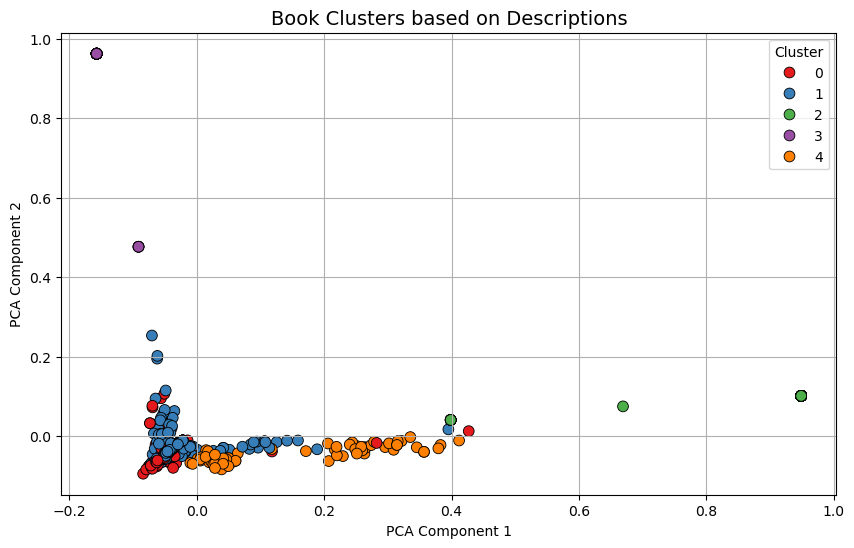

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=tfidf_reduced[:, 0],
    y=tfidf_reduced[:, 1],
    hue=df['cluster'],
    palette='Set1',
    s=60, edgecolor='k'  # Optional: larger points with border
)
plt.title('Book Clusters based on Descriptions', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


The above scatter plot visualizes the clusters of books based on their processed descriptions.

- **Color Coding**: Each color represents a different cluster (Cluster 0 to Cluster 4), as determined by the KMeans algorithm.
- **Insights**:
  - Clusters are tightly packed in the bottom-left region, indicating many books share similar language features.
  - Outlier points (farther away) may indicate unique or distinct content.
  - This plot helps us **visually distinguish the semantic groupings** of books based on their descriptions.



In [34]:
df.head()

,Book Name,Author,Description,Rating,Number of Reviews,Price,Listening Time (Minutes),Rank,Genre,Processed_Description,cluster
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,"Over the past three years, Jay Shetty has beco...",4.9,342.0,10080.0,654.0,1,Society & Culture (Books),"Over past three year , Jay Shetty become one w...",1
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,Brought to you by Penguin.,4.6,3670.0,615.0,203.0,2,Personal Success,Brought Penguin .,2
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,"In this generation-defining self-help guide, a...",4.4,20240.0,10378.0,317.0,3,Personal Development & Self-Help,"In generation-defining self-help guide , super...",1
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,Brought to you by Penguin.,4.6,4646.0,888.0,335.0,5,Personal Success,Brought Penguin .,2
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,"Stop going through life, Start growing throug...",4.6,4305.0,1005.0,385.0,6,Spiritualism,"Stop going life , Start growing life !",1


In [35]:
df.columns

Index(['Book Name', 'Author', 'Description', 'Rating', 'Number of Reviews',
       'Price', 'Listening Time (Minutes)', 'Rank', 'Genre',
       'Processed_Description', 'cluster'],
      dtype='object')

The dataset contains the above columns, each representing different attributes of the Audible books. 
The `Processed_Description` and `cluster` columns are engineered features created during the NLP and clustering pipeline.

In [36]:
df.drop(columns = ['Description'], inplace = True)

To streamline the dataset and avoid redundancy, dropping the original `Description` column 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Book Name                 1642 non-null   object 
 1   Author                    1642 non-null   object 
 2   Rating                    1642 non-null   float64
 3   Number of Reviews         1642 non-null   float64
 4   Price                     1642 non-null   float64
 5   Listening Time (Minutes)  1642 non-null   float64
 6   Rank                      1642 non-null   int64  
 7   Genre                     1642 non-null   object 
 8   Processed_Description     1642 non-null   object 
 9   cluster                   1642 non-null   int32  
dtypes: float64(4), int32(1), int64(1), object(4)
memory usage: 122.0+ KB


Now, the dataset contains **1,642 book entries** and **10 columns**, each representing key features for recommendation and analysis.

In [38]:
df.to_csv("books_clusters.csv", index=False)

After preprocessing and clustering, saving the cleaned and structured dataset to a CSV file `books_clusters.csv`